In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read data

In [2]:
portfolio_a_path = Path("../Resources/tech_stocks_2018_a.csv")
portfolio_b_path = Path("../Resources/tech_stocks_2018_b.csv")

portfolio_a = pd.read_csv(portfolio_a_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_b = pd.read_csv(portfolio_b_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

### Calculate Annualized Std Dev

In [3]:
# Calculate daily returns
portfolio_a_returns = portfolio_a.pct_change().dropna()
portfolio_b_returns = portfolio_b.pct_change().dropna()

# Concat returns into one DataFrame
all_portfolios_returns = pd.concat([portfolio_a_returns, portfolio_b_returns], axis='columns', join='inner')
all_portfolios_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,UBER,AMZN
Date,,,,,,,,,,
2018-01-02,0.066224,0.122337,1.084802,-0.145827,-0.051064,0.003038,0.044040,-0.071155,-0.177648,-0.051064
2018-01-03,0.008380,0.086957,-0.550053,0.274202,-0.226921,0.154685,0.090801,-0.138784,0.182390,-0.226921
2018-01-04,-0.251489,0.042723,0.584238,-0.177797,0.478183,0.043022,0.001242,0.412844,-0.050648,0.478183
2018-01-05,0.353559,-0.168933,1.258638,0.077894,0.025200,-0.073441,0.495269,-0.001412,-0.017052,0.025200
2018-01-06,-0.095579,0.202080,-0.179190,0.148095,-0.233604,0.004343,-0.593050,0.088776,0.110781,-0.233604


In [5]:
# Calculate Sharpe Ratio
sharpe_ratios = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

AAPL    1.477114
MSFT    1.350156
GOOG    4.936858
FB      1.740939
AMZN    1.846514
SNE     0.972066
AMD     4.652215
TWTR    1.977590
UBER    0.364985
AMZN    1.846514
dtype: float64

### Plot sharpe ratios

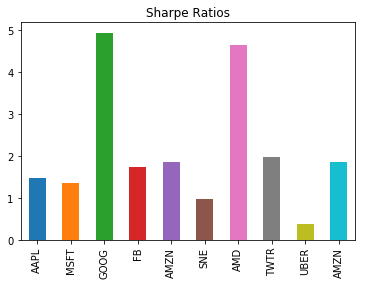

In [6]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [10]:
all_portfolios_returns["MSFT"].count()

99